In [1]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.insert(0, '../')

from TextLabeller import *

%matplotlib inline

In [2]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
    rfc = RandomForestClassifier()
#     from sklearn.naive_bayes import GaussianNB
#     rfc = GaussianNB()


    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return rfc, test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

/Users/dc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


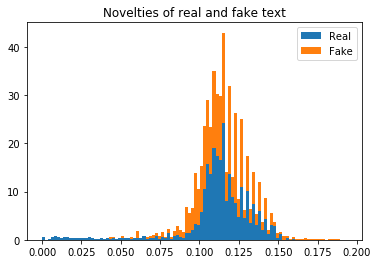

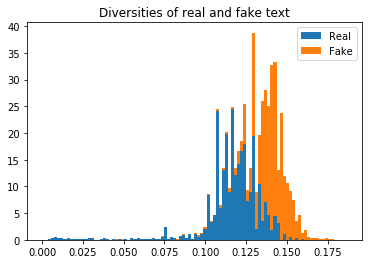

,index,text,novelty,diversity,label
11044,11044,he had been admitted that including since 2011...,0.098039,0.130435,0
11045,11045,new ship plans brought the mention of the peop...,0.135135,0.150754,0
11046,11046,"mr as added : `` i don ' t do for that , tired...",0.112195,0.136842,0
11047,11047,when the asian market may be is known that he ...,0.101523,0.123188,0
11048,11048,other is happening - but i thought he ' s made...,0.113300,0.141553,0
11049,11049,over the city and this step is been a 21st & h...,0.113636,0.139394,0
11050,11050,"while energy producers grew away five , from t...",0.126582,0.134503,0
11051,11051,`` mid - 1999 pledge to `` is difficult to be ...,0.145907,0.157895,0
11053,11053,s & e - ranging index in a middle - dealing sh...,0.092715,0.123188,0
11054,11054,just often see elderly male services across il...,0.115385,0.143519,0


In [5]:
METRIC = "levenshtein"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

# labelled_real=f'labelled_real_metrics_{METRIC}.csv'
# labelled_fake=f'labelled_fake_metrics_{METRIC}.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

combined_data = real_data.append(fake_data)

y = combined_data['label'].values

csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
stacked_hist(csvjac_novs, "Novelties of real and fake text")

csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
stacked_hist(csvjac_divs, "Diversities of real and fake text")

combined_data.tail(10)

## Classify using both novelty and diversity

input dimensions: 20855 | output dimensions: 20855
x_train dimensions: 18769 | y_train dimensions: 18769
x_test dimensions: 2086 | y_test dimensions: 2086
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1021
          1       0.99      0.98      0.99      1065

avg / total       0.99      0.99      0.99      2086

0.9865771812080537
[[1009   12]
 [  16 1049]]


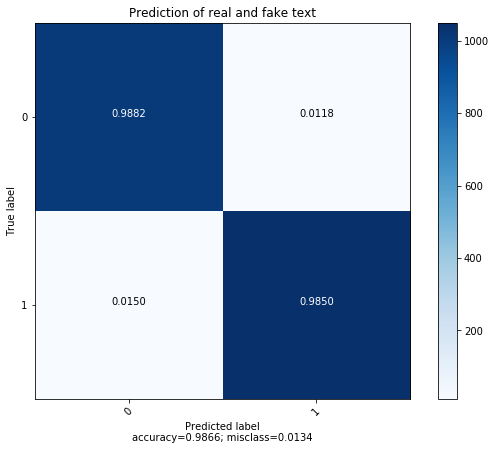

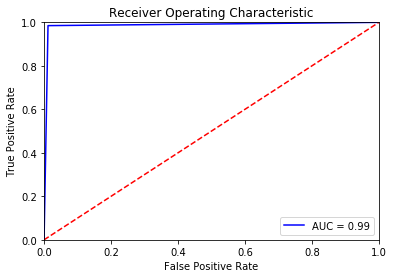

In [6]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

novs_divs_x = list()
for ix, nov in enumerate(novs):
    novs_divs_x.append([nov, divs[ix]])

rfc, test_labels, y_preds = classify(novs_divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

from sklearn.tree import export_graphviz

# export_graphviz(rfc.estimators_[5],
#                 feature_names=['novelty', 'diversity'],
#                 class_names=['Fake','Real'],
#                 filled=True, precision=True, proportion=False,
#                 rounded=True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'nov_div.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='nov_div.png')

## Classify using only novelty

input dimensions: 20855 | output dimensions: 20855
x_train dimensions: 18769 | y_train dimensions: 18769
x_test dimensions: 2086 | y_test dimensions: 2086
             precision    recall  f1-score   support

          0       0.88      0.83      0.85      1053
          1       0.83      0.89      0.86      1033

avg / total       0.86      0.86      0.86      2086

0.8552253116011506
[[869 184]
 [118 915]]


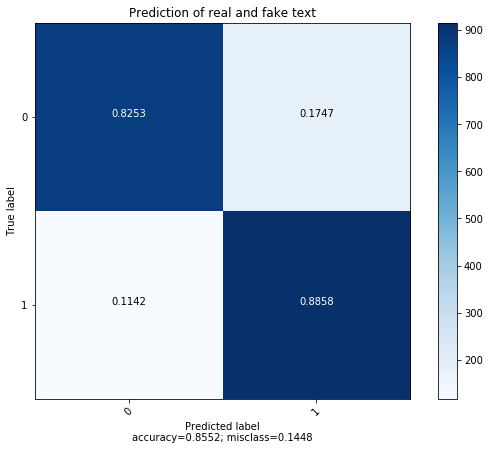

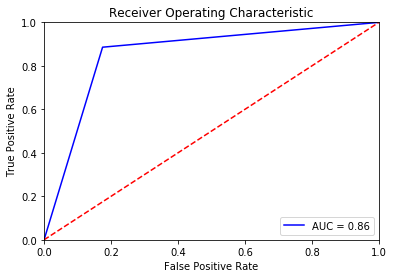

In [7]:
novs = combined_data['novelty'].values

novs_x = list()
for ix, nov in enumerate(novs):
    novs_x.append([nov])

rfc, test_labels, y_preds = classify(novs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

# export_graphviz(rfc.estimators_[5],
#                 feature_names=['diversity'],
#                 class_names=['Fake','Real'],
#                 filled=True, precision=True, proportion=False,
#                 rounded=True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'nov.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='nov.png')

## Classify using only diversity

input dimensions: 20855 | output dimensions: 20855
x_train dimensions: 18769 | y_train dimensions: 18769
x_test dimensions: 2086 | y_test dimensions: 2086
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      1048
          1       0.96      0.97      0.96      1038

avg / total       0.96      0.96      0.96      2086

0.9645254074784276
[[1001   47]
 [  27 1011]]


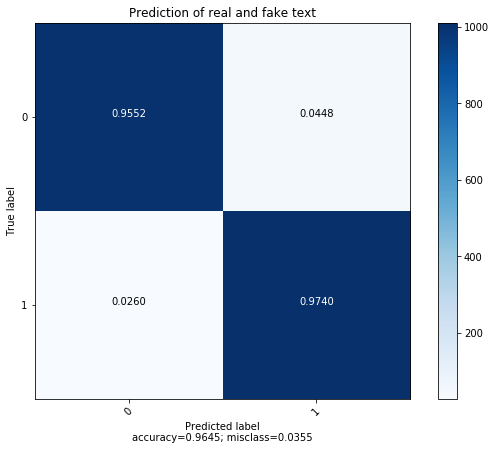

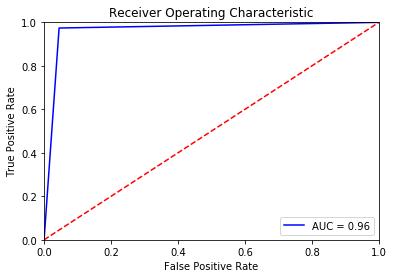

In [8]:
divs = combined_data['diversity'].values

divs_x = list()
for ix, div in enumerate(divs):
    divs_x.append([div])

rfc, test_labels, y_preds = classify(divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

# export_graphviz(rfc.estimators_[5],
#                 feature_names=['diversity'],
#                 class_names=['Fake','Real'],
#                 filled=True, precision=True, proportion=False,
#                 rounded=True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'div.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='div.png')

## Classify with both novelty and diversity: test with unseen data (TBD)

In [9]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])
    
# # unlabelled_real='unlabelled_real_text.csv' # not really unlabelled, just missing novelty and diversity
# # unlabelled_fake='unlabelled_fake_text.csv' # same here

# # _real_data = pd.read_csv(unlabelled_real)
# # _fake_data = pd.read_csv(unlabelled_real)

# # _combined_data = _real_data.append(_fake_data)

# # x_train, test, train_labels, test_labels = x,  , y, _combined_data['label'].values

# x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

# print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
# print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
# print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# import xgboost as xgb
# model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, 
#                           reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
# model.fit(x_train, train_labels) 


# # # Initialize classifier
# # rfc = RandomForestClassifier()

# # # Train classifier
# # model = rfc.fit(x_train, train_labels)

# # Make predictions
# preds = rfc.predict(test)

# # Evaluate model
# from sklearn.metrics import classification_report, accuracy_score
# print(classification_report(test_labels, preds))
# print(accuracy_score(test_labels, preds))

[[0.1126126126126126], [0.12355212355212353], [0.09375], [0.1126126126126126], [0.0641025641025641], [0.09569377990430628], [0.09937888198757763], [0.08759124087591241], [0.11538461538461542], [0.12658227848101267]] [1 0 0 1 1 0 1 0 0 1]
[0.58005511 0.43987104 0.59568218 ... 0.43900153 0.45867803 0.49505494]
[[0.1417004048582996], [0.14666666666666672], [0.13567839195979906], [0.14691943127962082], [0.11616161616161615], [0.11282051282051282], [0.125], [0.14110429447852754], [0.12318840579710146], [0.13978494623655913]] [0 0 0 0 1 1 0 0 0 0]
[0.16452631 0.16501594 0.85990341 ... 0.92281985 0.94800793 0.18523529]
[[0.11059907834101383, 0.11029411764705882], [0.10849056603773588, 0.14110429447852754], [0.11415525114155245, 0.13609467455621305], [0.11842105263157897, 0.1301775147928994], [0.10377358490566037, 0.13496932515337426], [0.10227272727272728, 0.10638297872340426], [0.1088082901554404, 0.1076923076923077], [0.125, 0.12831858407079647], [0.11111111111111116, 0.1266666666666667], [

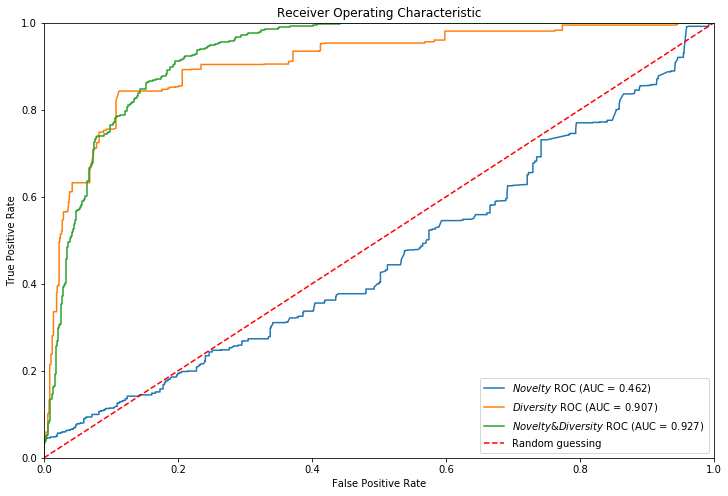

In [12]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model = GaussianNB()

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$Novelty$',
    'model': model,
    'metric': novs_x
},
{
    'label': '$Diversity$',
    'model': model,
    'metric': divs_x
},
    {
    'label': '$Novelty & Diversity$',
    'model': model,
    'metric': novs_divs_x
},
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
    print(y_preds)

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()   # Display



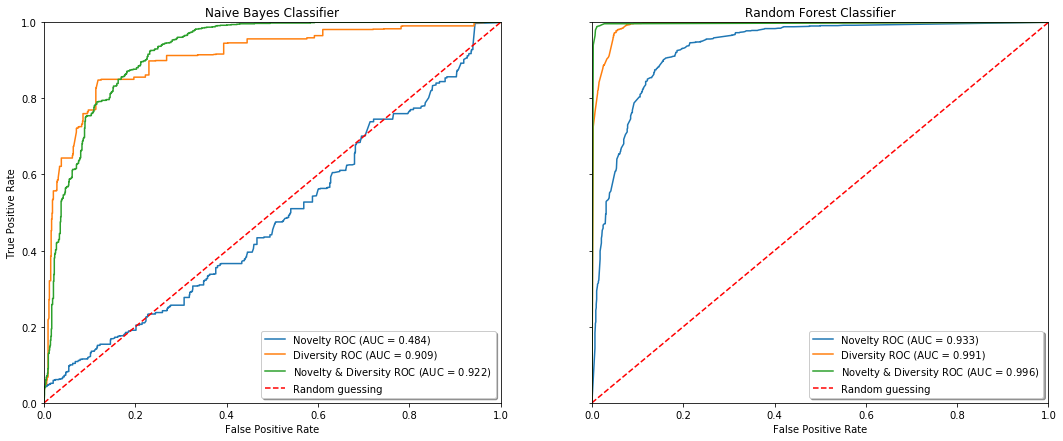

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': model,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': model,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': model,
    'metric': novs_divs_x
},
]


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display

